In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import seaborn as sns
import edhec_risk_kit as erk

In [53]:
data = pd.read_csv("stock_data.csv", index_col=0, parse_dates=True)
data.head(5)

,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2009-12-31,23.493395,134.520004,19.483227,24.065151,43.977592,10.604203,42.586098,10.716870,30.619154,25.254896,32.882641,28.090710,17.246176,6.968013,NaN
2010-01-04,23.855658,133.899994,19.496914,24.146002,44.155968,10.372269,43.185635,11.152852,31.524038,26.124914,33.334297,27.933922,17.258133,7.163116,NaN
2010-01-05,23.863367,134.690002,19.261057,24.074553,44.022186,10.919640,43.354256,10.993775,32.134663,26.083477,33.540306,27.864239,17.242193,7.636940,NaN
2010-01-06,23.716913,132.250000,19.254227,24.039745,44.594494,10.594928,43.728966,10.958426,32.311214,26.340338,33.896870,27.716162,17.840048,7.922629,NaN
2010-01-07,23.470270,130.000000,19.206366,23.882650,44.378941,10.752646,43.591564,10.917185,32.951271,27.351198,33.865173,27.724876,17.883890,8.124702,NaN


<AxesSubplot:>

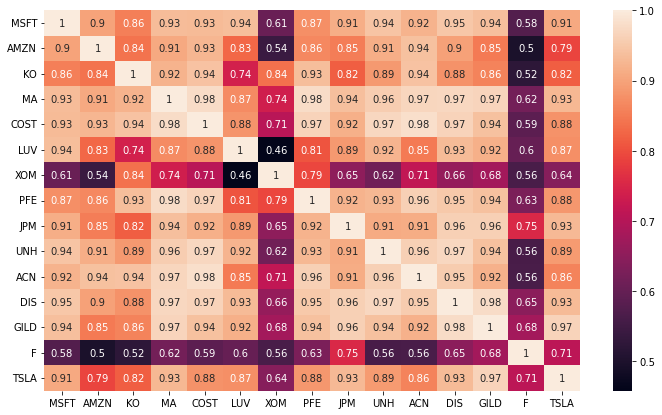

In [86]:
past_data, future_data = data.iloc[:-1500], data.iloc[-1500:]
plt.figure(figsize=(12,7))
sns.heatmap(past_data.corr(),annot=True)

<AxesSubplot:>

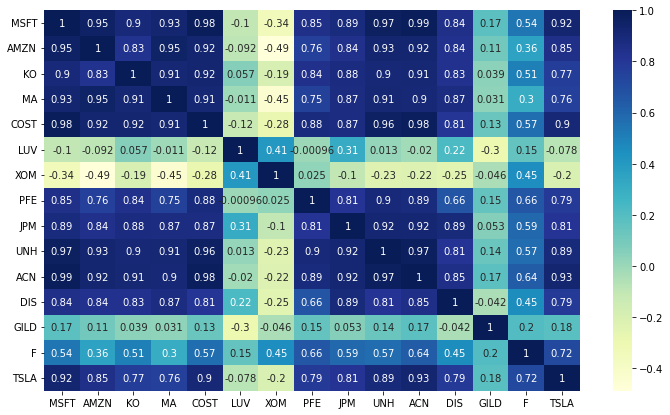

In [88]:
plt.figure(figsize=(12,7))
sns.heatmap(future_data.corr(),annot=True, cmap="YlGnBu")

In [59]:
#
stock_returns = data.pct_change().dropna()
# converting  daily stocks returns to monthly
stock_returns_monthly = stock_returns.resample('M').apply(erk.compound).to_period('M')
stock_returns_monthly.head(4)

,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2010-06,-0.012870,0.005985,-0.004173,-0.017045,-0.014381,0.000000,-0.003840,-0.001400,-0.012143,-0.008033,0.000000,-0.024768,-0.019731,0.020243,-0.002512
2010-07,0.121686,0.078986,0.099561,0.053466,0.034288,0.084609,0.045734,0.051893,0.101750,0.072183,0.025615,0.069524,-0.028005,0.266865,-0.163240
2010-08,-0.085812,0.058868,0.013972,-0.055608,-0.000078,-0.082614,-0.002463,0.073127,-0.097318,0.041708,-0.076690,-0.034135,-0.044718,-0.115896,-0.023069
2010-09,0.043460,0.258191,0.055178,0.129260,0.141416,0.182805,0.045339,0.079196,0.046755,0.110955,0.160929,0.017210,0.118756,0.084145,0.047741


In [60]:
#Summary  stats for companies 
erk.summary_stats(stock_returns_monthly)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
MSFT,0.268939,0.205694,1.130556,0.269585,3.290585,0.088227,0.070613,-0.157042
AMZN,0.334551,0.277154,1.069400,0.367482,3.634309,0.117934,0.094182,-0.253757
KO,0.110992,0.152971,0.515145,-0.728238,4.406553,0.094615,0.070008,-0.235650
MA,0.278693,0.216760,1.116607,-0.246340,3.304998,0.114717,0.083844,-0.235424
COST,0.245428,0.168769,1.242375,-0.223241,3.194497,0.083482,0.063073,-0.131274
LUV,0.128588,0.309562,0.309591,0.269581,3.670570,0.158813,0.124294,-0.514540
XOM,0.071250,0.233852,0.171385,0.133782,6.203961,0.141953,0.095705,-0.583960
PFE,0.166474,0.205026,0.647672,0.486991,4.311278,0.100387,0.072414,-0.258397
JPM,0.149753,0.247123,0.471342,-0.463634,4.362940,0.153502,0.109785,-0.350015
UNH,0.294560,0.195783,1.315235,0.083525,3.149975,0.086773,0.067822,-0.217555


## Global Minimum Variance (GMV) Portfolio
Since we are interested in portfolio optimization I will go further to construct a GMV portfolio using a robust estimator for the covariance matrix .This will help provide a reasonable estimate for volatility of all the companies. Returns are very difficult to estimate. The reason for constructing a GMV portfolio is that, this type of portfolio does not require the estimation of expected returns and also, this is the only portfolio with the minimum risk that can be found on the efficient frontier. We would construct a GMV portfolio and back-test it and see how well it performs over time. The table below shows relevant statistics for back-testing and also a chart to compare different types of portfolios.

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
GMV,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558
EW,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558
GMV_SHRINKAGE,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558


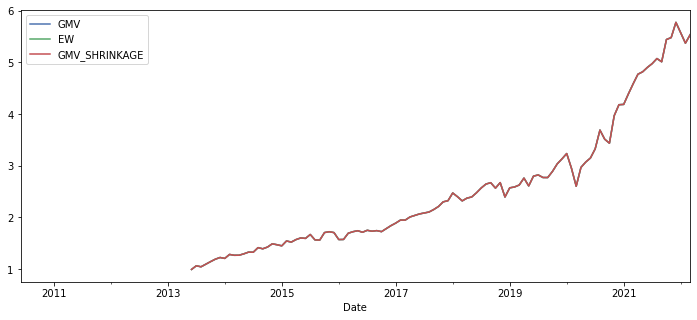

In [73]:
gmv= erk.backtest_weight_scheme(r=stock_returns_monthly,estimation_window=36,weighting=erk.weight_rp, cov_estimator=erk.sample_cov)
ew_port = erk.backtest_weight_scheme(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_ew)
gmv_shrink = erk.backtest_weight_scheme(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_rp, cov_estimator=erk.shrinkage_cov)
btr= pd.DataFrame({'GMV':gmv, 'EW':ew_port, 'GMV_SHRINKAGE':gmv_shrink})
(1+btr).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr.dropna())

## Portfolio Risk Contributions
These are portfolios that have equal risk contribution of each of the components in the portfolio. These portfolios are sometimes preferred because weights are allocated based on each asset contribution to the riskiness of the portfolio as opposed to just allocating weights based on returns. We would therefore, go ahead and construct a portfolio with equal risk contribution and back-test it and see how well it performs.

<AxesSubplot:>

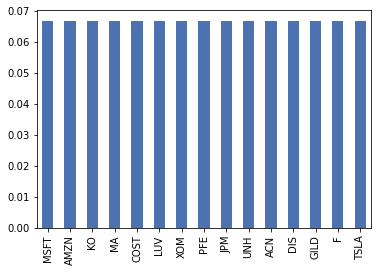

In [76]:
#calculating covariance matrix using shronkage method
cov_shrinkage = erk.shrinkage_cov(stock_returns_monthly)
#using weights of gmv porfolio to find risk contributions
weights = erk.weight_rp(stock_returns_monthly,erk.shrinkage_cov)
erk.portfolio_risk_contributions(weights, cov_shrinkage).plot(kind='bar')

The chart above indicates how the risks is spread equally across the companies.

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
GMV,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558
EW,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558
GMV_SHRINKAGE,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558
MSR,0.213689,0.148796,1.201522,-0.125488,4.769601,0.084478,0.053129,-0.19558


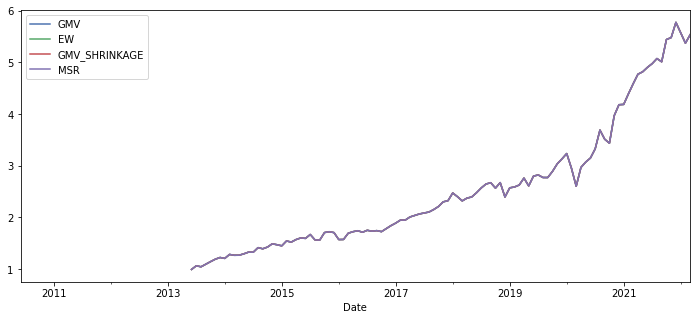

In [84]:
#backtesting portfolios
gmv = erk.backtest_weight_scheme(r=stock_returns_monthly,estimation_window=36, weighting=erk.weight_rp,cov_estimator=erk.sample_cov )
ew_port = erk.backtest_weight_scheme(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_ew)
gmv_shrink = erk.backtest_weight_scheme(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_rp, cov_estimator=erk.shrinkage_cov)
max_sharpe = erk.backtest_weight_scheme(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_maxsharpe, cov_estimator=erk.shrinkage_cov)
btr= pd.DataFrame({'GMV':gmv, 'EW':ew_port, 'GMV_SHRINKAGE':gmv_shrink, 'MSR':max_sharpe})
(1+btr).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr.dropna())